# Implement Constant Proportion Portfolio Insurance (CPPI)

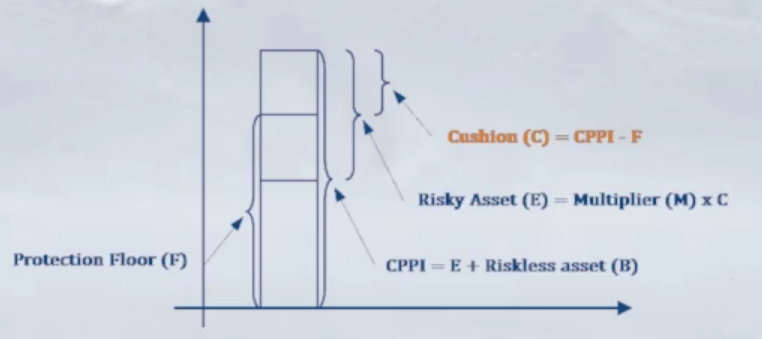

CPPI is a type of portfolio insurance in which the investor sets a floor on the dollar value of their portfolio, then structures asset allocation around the decision. The two asset classes used in CPPI are a risky asset and a conservative asset of either cash, equivalents or treary bonds. The percentage allocated to each depends on the "cusion" value, defined as current portfolio value minus floor value, and a multiplier coefficient, where a higher number denotes a more aggressive strategy.

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import util_functions as f
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# 1. Data Preparation

Load the 30 industry returns from Ken French data library.

In [3]:
rets = f.get_ffme_returns('30_Industry_Portfolios')
rets

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0191,-0.2379,0.0007,0.0187,-0.0002,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0797,...,0.0217,0.0202,0.0439,-0.0238,0.0485,0.0539,-0.0075,-0.0013,0.0447,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0230,...,0.0241,0.0225,0.0019,-0.0554,0.0007,-0.0787,0.0025,-0.0056,-0.0161,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0261,-0.1538,-0.0220,-0.0411,-0.0551,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0310,...,0.0163,0.0377,0.0364,0.0384,0.0161,0.0467,0.0652,0.0433,0.0234,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08,0.0507,0.0088,0.0796,0.0540,0.0170,0.0630,0.0578,0.0644,0.0145,-0.0170,...,0.0121,0.0167,0.0146,0.0304,0.0245,-0.0121,0.0075,0.0547,0.0250,0.0610
2024-09,0.0097,0.0132,-0.0131,0.0422,-0.0234,0.0105,0.0576,-0.0181,0.0379,0.0163,...,0.0563,0.0353,0.0223,0.0087,0.0250,-0.0072,0.0409,0.0543,-0.0051,-0.0072
2024-10,-0.0530,-0.0515,0.0846,0.0377,0.0083,-0.0581,-0.0612,-0.0311,-0.0374,-0.1713,...,0.0236,-0.0040,0.0000,-0.0359,0.0137,-0.0158,-0.0096,-0.0064,0.0264,-0.0269


The 30 industries include the following:

In [4]:
rets.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

# 2. CPPI Implementation

## 2.1 Beer Industry

In [5]:
industry = 'Beer'
start_date = '2000-01'
end_date = '2024-12'

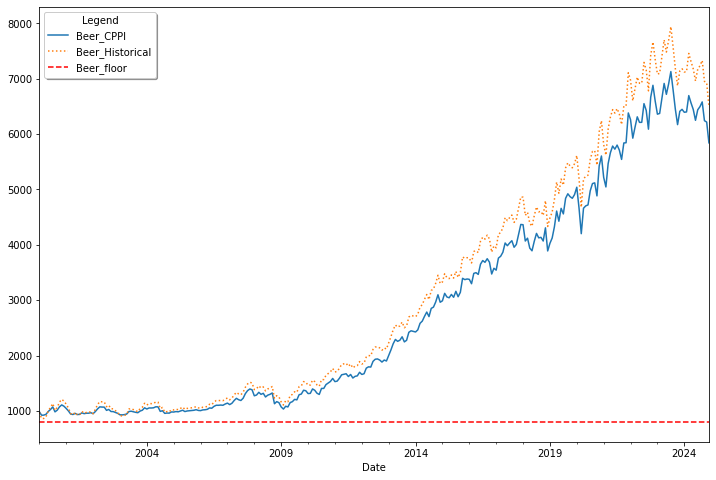

In [6]:
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=None)

If I just invested in Beer industry alone, the CPPI strategy will generate lower return, as there is certain allocation to the safe asset required.

In [7]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer,7.4%,12.5%,-0.33,4.1,5.5%,7.7%,0.34,-25.9%


In [8]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer,7.9%,14.3%,-0.31,3.8,6.3%,9.0%,0.33,-27.1%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown. 

## 2.2 Steel Industry

If I just invested in Steel industry alone, CPPI strategy apparently has lower variation and will protect my portfolio above the floor value.

In [9]:
industry = 'Steel'
start_date = '2000-01'
end_date = '2024-12'

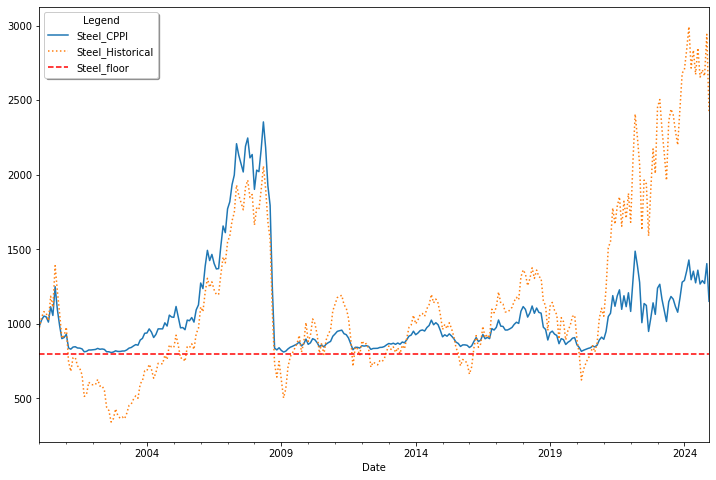

In [10]:
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=None)

In [11]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,0.6%,20.1%,-0.99,9.7,10.0%,14.7%,-0.12,-65.6%


In [12]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,3.7%,33.3%,-0.16,3.5,15.3%,21.0%,0.02,-75.5%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown.

## 2.3 Finance Industry

In [13]:
industry = 'Fin'
start_date = '2000-01'
end_date = '2024-12'

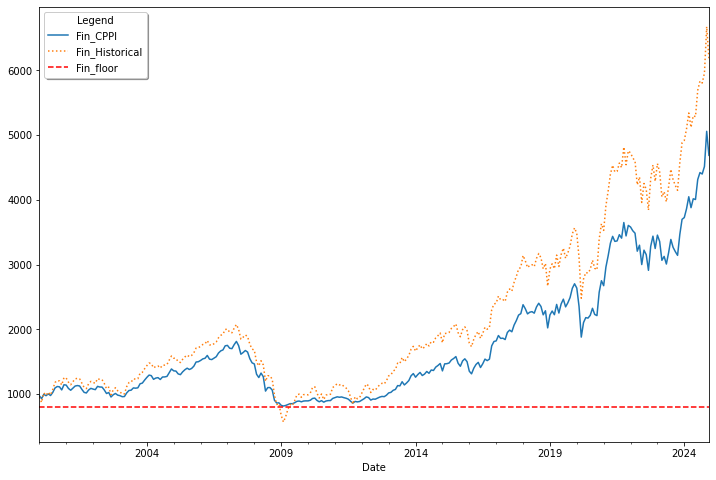

In [14]:
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=None)

If I just invested in Financial industry alone, CPPI strategy will generate lower return, but will protect the portfolio above the floor value.

In [15]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin,6.5%,15.6%,-0.53,5.7,7.2%,10.5%,0.22,-55.0%


In [16]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin,7.8%,20.0%,-0.49,4.7,9.3%,13.4%,0.23,-72.6%


CPPI although generates a lower annualized return, has reduced the volatility, VaR and maximum drawdown.

# 3. CPPI with Explicitly Limiting Drawdowns

It can be seen that CPPI usually help with lowering the maximum drawdowns, in fact, these strategies can also be adapted to explictly limit the drawdown. Now I set the drawdown limit to 25% for each industry portfolio.

## 3.1 Beer Industry

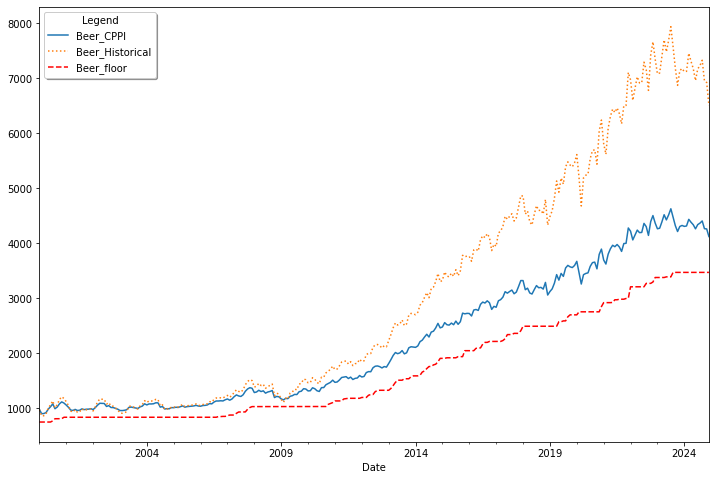

In [17]:
industry = 'Beer'
start_date = '2000-01'
end_date = '2024-12'
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)

In [18]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer,5.9%,9.2%,-0.5,4.0,4.2%,6.0%,0.31,-16.1%


In [19]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Beer,7.9%,14.3%,-0.31,3.8,6.3%,9.0%,0.33,-27.1%


## 3.2 Steel Industry

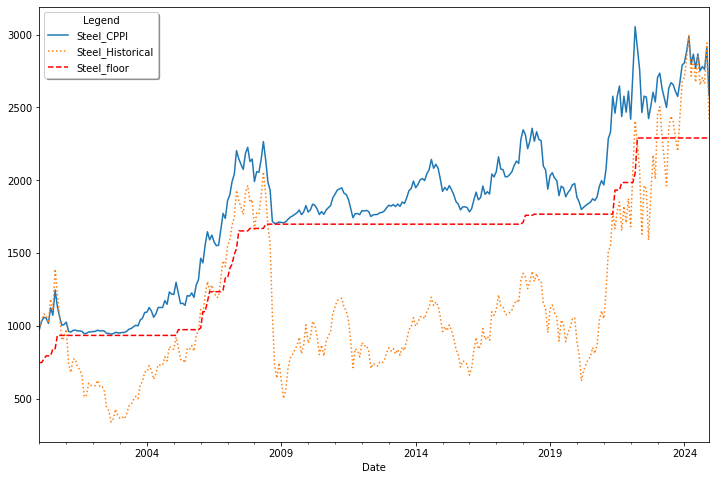

In [20]:
industry = 'Steel'
start_date = '2000-01'
end_date = '2024-12'
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)

In [21]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,4.0%,12.9%,0.35,5.1,5.2%,7.8%,0.072,-24.8%


In [22]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Steel,3.7%,33.3%,-0.16,3.5,15.3%,21.0%,0.02,-75.5%


## 3.3 Financial Industry

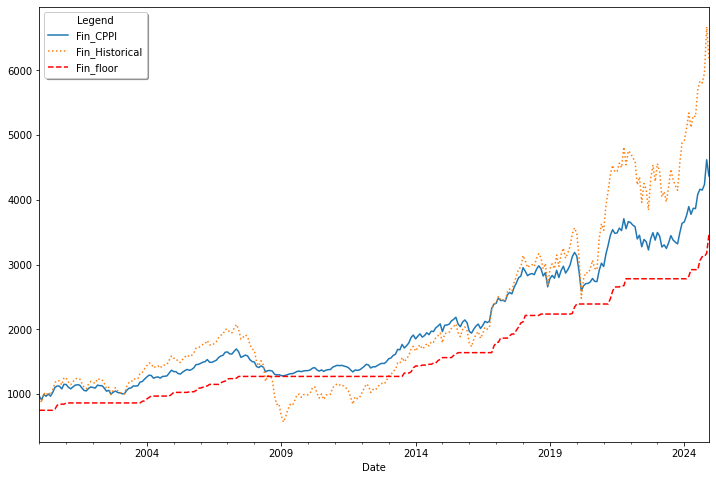

In [23]:
industry = 'Fin'
start_date = '2000-01'
end_date = '2024-12'
f.show_cppi_single_industry(rets, industry=industry,start_date=start_date,end_date=end_date,safe_r=None, 
                            m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)

In [24]:
btr = f.run_cppi(rets[start_date:end_date][[industry]], safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03,drawdown=0.25)
summary = f.summary_stats(btr["Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin,6.2%,9.9%,-0.24,3.9,4.3%,6.0%,0.32,-24.4%


In [25]:
summary = f.summary_stats(btr["Risky Wealth"].pct_change().dropna(), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
Fin,7.8%,20.0%,-0.49,4.7,9.3%,13.4%,0.23,-72.6%


# 4. CPPI using Monte Carlo Simulation

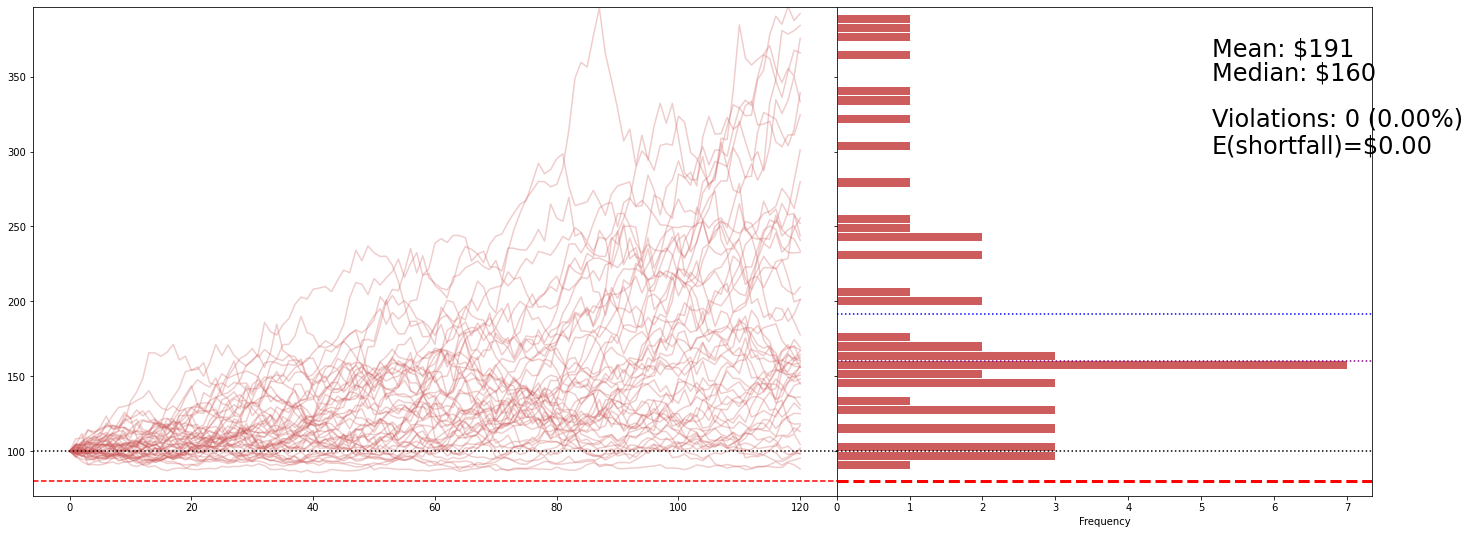

In [26]:
f.show_cppi()

In [27]:
cppi_controls = widgets.interactive(f.show_cppi,
                                    n_scenarios = widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0.,+.2,.01),
                                    sigma=(0, .30, .05),
                                    floor=(0, 2, .1),
                                    m=(1,5,.5),
                                    riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12,
                                                          description="Rebals/Year"),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100,
                                                           description="Zoom Y Axis"))
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

The chart presents all the scenarios for the evoluation of portfolio value using CPPI strategy and the distribution of the portfolio's terminal wealth. Return of the portfolio is based on the monte carlo simulation of Geometric Brownian Motion.

# 5. Liability-Driven Investing

The liability-driven investing (LDI) paradigm, which is supported by portfolio theory and has now become the accepted approach to asset-liability management, recommends that investors should in general hold a combination of a well-diversified performance-seeking portfolio (PSP), which targets diversification, and a safe liability/goal-hedging portfolio (LHP/GHP), which takes care of hedging.

## 5.1 A Basic Form of Liability-Driven Investing (LDI) Strategies

A simple form of LDI strategies is a fixed-mix combination of the two building blocks, in which the allocation to the PSP is adjusted in order to reach a target relative risk level.

I start by examining the performance of a 70-30 allocation to Stocks and Bonds. I use the Geometric Brownian Motion to generate equity returns, assuming Stocks return an average of 7% per year with a 15% vol. I use the Cox Ingersoll Ross Model (CIR) model to generate bond prices for a 10 year and 30 year bond that pays a 5% coupon. For simplicity, assume the coupon is paid monthly to avoid having to deal with partial coupons. Assume the Bond Portfolio consists of 60% in the 10 year bond and 40% in the 30 year bond.  

### 5.1.1 Monte Carlo Simulation of Asset Returns

### CIR model
$$ dr_{t}=a(b-r_{t})\,dt+\sigma {\sqrt  {r_{t}}}\,dW_{t} $$

where $a$ is the speed of mean reversion and $b$ is the long term mean rate and $\sigma$ is the volatility parameter.

### Short Rate vs. Annualized Rate

Short rate refers to the continuous compounding rate.
$$ 1 + r_{annual} = e^{r_{inst}} $$

### Geometric Brownian Motion
The stochastic model for stock returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

When we generate simulated returns, we can usually ignore the decomposition of $\mu$ since we only care about the net effective drift term without worrying about what the components of it are.

In [28]:
# simulate annualized interest rates
rates = f.cir(n_years = 10, n_scenarios=500, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=0.03)
# simulate 10-year and 30-year bond price
price_10 = f.bond_price(maturity=10, principal=100, coupon_rate=0.05, coupons_per_year=12, discount_rate=rates)
price_30 = f.bond_price(maturity=30, principal=100, coupon_rate=0.05, coupons_per_year=12, discount_rate=rates)
# calculate bond returns
rets_10 = f.bond_total_return(price_10, principal=100, coupon_rate=0.05, coupons_per_year=12)
rets_30 = f.bond_total_return(price_30, principal=100, coupon_rate=0.05, coupons_per_year=12)

In [30]:
# simulate stock price
price_eq = f.gbm(n_years=10, n_scenarios=500,mu=0.07,sigma=0.15,steps_per_year=12,s_0=100)
# calculate stock return
rets_eq = price_eq.pct_change().dropna()

### 5.1.2 The Simplest Allocator - Fixed Mix

The allocator's job is to come up with a time series of weights, so the simplest possible allocation is to put a fixed fraction in the portfolio and the remaining in the second. Here we can test a bond portfolio of 60% in the 10 year bond and 40% in the 30 year bond.

In [38]:
rets_bonds = f.bt_mix(rets_10, rets_30, allocator=f.fixedmix_allocator, w1=0.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
summary = f.summary_stats(pd.DataFrame(mean_rets_bonds), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,3.8%,0.4%,0.13,2.7,-0.1%,-0.1%,1.8,0.0%


Next, we build a 70-30 stock-bond mix.

In [39]:
# calculate 70/30 stock/bond portfolio return
rets_7030b = f.bt_mix(rets_eq, rets_bonds, allocator=f.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis='columns')
summary = f.summary_stats(pd.DataFrame(rets_7030b_mean), periods_per_year=12, riskfree_rate=0.03)
summary = summary.style.format(formatter="{:.1%}",subset=["Annualized Return","Annualized Vol", "Cornish-Fisher VaR (5%)","Historic CVaR (5%)","Max Drawdown"])
summary = summary.format(formatter="{:.2}",subset=["Sharpe Ratio","Skewness","Kurtosis"])     
summary

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
0,6.0%,0.5%,0.11,3.2,-0.3%,-0.2%,6.1,0.0%


In [43]:
# compute stats on each scenario and then average
summaries = f.summary_stats(rets_7030b,periods_per_year=12, riskfree_rate=0.03)
summaries.mean()

Annualized Return          0.054193
Annualized Vol             0.108998
Skewness                   0.006291
Kurtosis                   2.977860
Cornish-Fisher VaR (5%)    0.046609
Historic CVaR (5%)         0.059081
Sharpe Ratio               0.218152
Max Drawdown              -0.212006
dtype: float64